#4.5.2 가우시안 나이브 베이즈를 활용한 붓꽃 분류

특징들이 가우시안 분포를 가지고 연속적인 값일 경우 -> 가우시안 나이브 베이즈

## 라이브러리 임포트

In [ ]:
# 시각화를 위해 pandas를 임포트합니다
import pandas as pd
# iris 데이터는 sklearn에서 직접 로드할 수 있습니다
from sklearn.datasets import load_iris
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있습니다
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes로 iris 데이터를 분류하도록 하겠습니다
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics를 임포트합니다
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

##데이터 획득

In [ ]:
# iris 데이터를 불러옵니다
dataset = load_iris()
# pandas의 데이터프레임으로 데이터를 저장합니다
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터프레임에 저장합니다
df['target'] = dataset.target
# 숫자인 분류값을 이해를 돕기위해 문자로 변경합니다
df.target = df.target.map({0:"setosa", 1:"versicolor", 2:"virginica"})
# 데이터를 확인해봅니다
df.head()
# sepal : 꽃받침, petal : 꽃잎, length : 길이, width : 폭

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##데이터 분포 보기

In [ ]:
df.target.value_counts()

virginica     50
setosa        50
versicolor    50
Name: target, dtype: int64

##3가지 붓꽃 종류에 대해 꽃받침과 꽃잎의 길이와 폭 데이터 시각화

In [ ]:
# 분류값 별로 데이터프레임을 나눕니다
setosa_df = df[df.target == "setosa"]
versicolor_df = df[df.target == "versicolor"]
virginica_df = df[df.target == "virginica"]

##sepal length (cm) : 꽃받침 길이

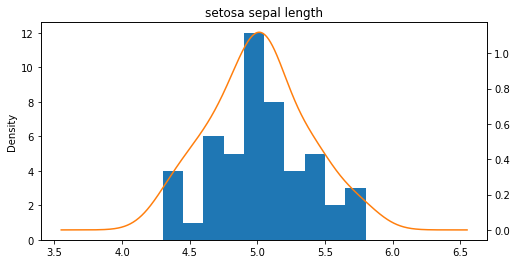

In [ ]:
# setosa ires 꽃받침 길이 분포

# 히스토그램(분포 막대 그래프) 그리기
ax = setosa_df['sepal length (cm)'].plot(kind='hist') # kind='hist' : 히스토그램 형식으로 그리기
# 'ax=' 은 바로 아래 KDE 그래프와 x축을 맞추기 위해서 사용

# KDE그래프(선) 그리기: Kernel Density Estimation : 히스토그램을 스무딩한 형식의 확률분포로 표현. 최대치가 1임. 
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, #우측에 두 번째 y축을 표시(KDE꺼)
        title="setosa sepal length", 
        figsize = (8,4)) # 그림 크기

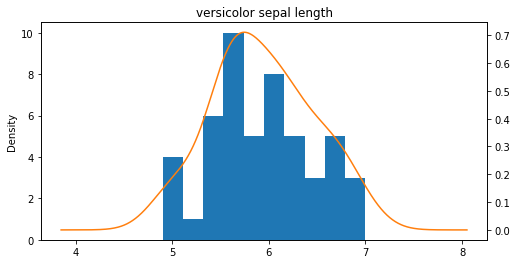

In [ ]:
# versicolor ires 꽃받침 길이 분포

# 히스토그램(분포 막대 그래프) 그리기
ax = versicolor_df['sepal length (cm)'].plot(kind='hist') # kind='hist' : 히스토그램 형식으로 그리기
# 'ax=' 은 바로 아래 KDE 그래프와 x축을 맞추기 위해서 사용

# KDE그래프(선) 그리기: Kernel Density Estimation : 히스토그램을 스무딩한 형식의 확률분포로 표현. 최대치가 1임. 
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, #우측에 두 번째 y축을 표시(KDE꺼)
        title="versicolor sepal length", 
        figsize = (8,4)) # 그림 크기

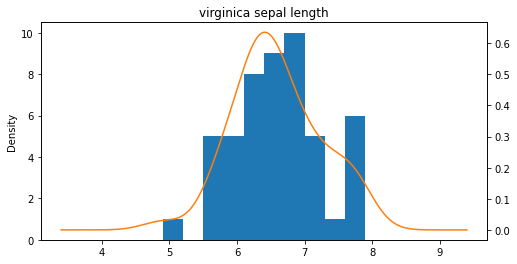

In [ ]:
# virginica ires 꽃받침 길이 분포

# 히스토그램(분포 막대 그래프) 그리기
ax = virginica_df['sepal length (cm)'].plot(kind='hist') # kind='hist' : 히스토그램 형식으로 그리기
# 'ax=' 은 바로 아래 KDE 그래프와 x축을 맞추기 위해서 사용

# KDE그래프(선) 그리기: Kernel Density Estimation : 히스토그램을 스무딩한 형식의 확률분포로 표현. 최대치가 1임. 
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, #우측에 두 번째 y축을 표시(KDE꺼)
        title="virginica sepal length", 
        figsize = (8,4)) # 그림 크기

## sepal width (cm) : 꽃받침 폭

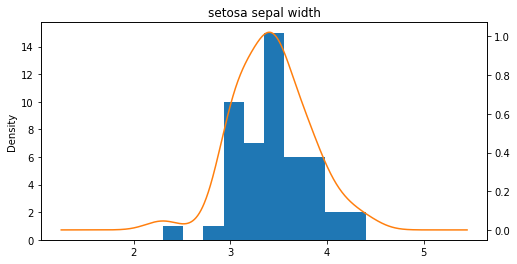

In [ ]:
# setosa ires 꽃받침 폭 분포

# 히스토그램(분포 막대 그래프) 그리기
ax = setosa_df['sepal width (cm)'].plot(kind='hist') # kind='hist' : 히스토그램 형식으로 그리기
# 'ax=' 은 바로 아래 KDE 그래프와 x축을 맞추기 위해서 사용

# KDE그래프(선) 그리기: Kernel Density Estimation : 히스토그램을 스무딩한 형식의 확률분포로 표현. 최대치가 1임. 
setosa_df['sepal width (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, #우측에 두 번째 y축을 표시(KDE꺼)
        title="setosa sepal width", 
        figsize = (8,4)) # 그림 크기

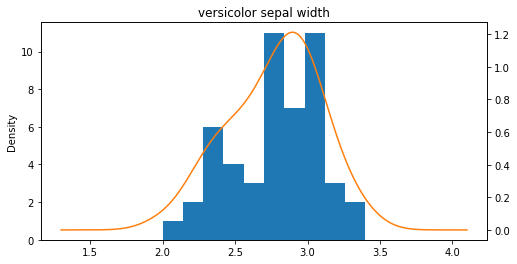

In [ ]:
# versicolor ires 꽃받침 폭 분포

# 히스토그램(분포 막대 그래프) 그리기
ax = versicolor_df['sepal width (cm)'].plot(kind='hist') # kind='hist' : 히스토그램 형식으로 그리기
# 'ax=' 은 바로 아래 KDE 그래프와 x축을 맞추기 위해서 사용

# KDE그래프(선) 그리기: Kernel Density Estimation : 히스토그램을 스무딩한 형식의 확률분포로 표현. 최대치가 1임. 
versicolor_df['sepal width (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, #우측에 두 번째 y축을 표시(KDE꺼)
        title="versicolor sepal width", 
        figsize = (8,4)) # 그림 크기

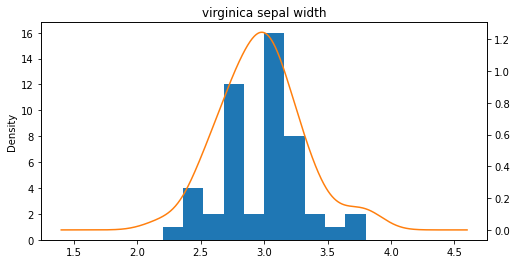

In [ ]:
# virginica ires 꽃받침 폭 분포

# 히스토그램(분포 막대 그래프) 그리기
ax = virginica_df['sepal width (cm)'].plot(kind='hist') # kind='hist' : 히스토그램 형식으로 그리기
# 'ax=' 은 바로 아래 KDE 그래프와 x축을 맞추기 위해서 사용

# KDE그래프(선) 그리기: Kernel Density Estimation : 히스토그램을 스무딩한 형식의 확률분포로 표현. 최대치가 1임. 
virginica_df['sepal width (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, #우측에 두 번째 y축을 표시(KDE꺼)
        title="virginica sepal width", 
        figsize = (8,4)) # 그림 크기

##petal length (cm) : 꽃잎 길이

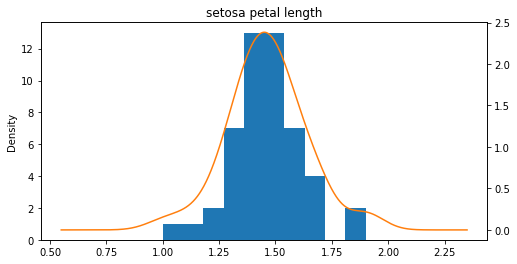

In [ ]:
# setosa ires 꽃잎 길이 분포

ax = setosa_df['petal length (cm)'].plot(kind='hist')
setosa_df['petal length (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, 
        title="setosa petal length", 
        figsize = (8,4))

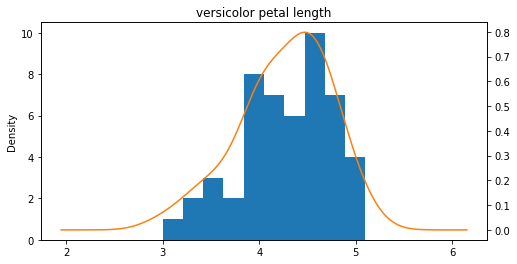

In [ ]:
# versicolor ires 꽃잎 길이 분포

ax = versicolor_df['petal length (cm)'].plot(kind='hist')
versicolor_df['petal length (cm)'].plot(kind='kde', ax=ax, 
            secondary_y=True, 
            title="versicolor petal length", 
            figsize = (8,4))

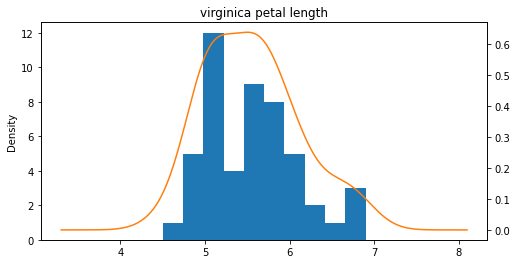

In [ ]:
# virginica ires 꽃잎 길이 분포

ax = virginica_df['petal length (cm)'].plot(kind='hist')
virginica_df['petal length (cm)'].plot(kind='kde', ax=ax, 
            secondary_y=True, 
            title="virginica petal length", 
            figsize = (8,4))

##petal width (cm) : 꽃잎 폭

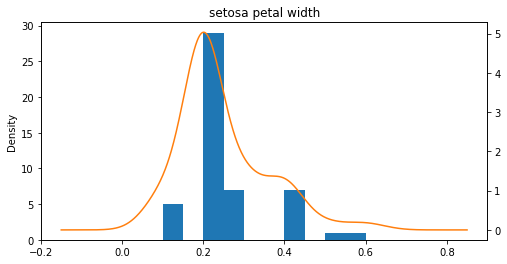

In [ ]:
# setosa ires 꽃잎 폭 분포

ax = setosa_df['petal width (cm)'].plot(kind='hist')
setosa_df['petal width (cm)'].plot(kind='kde', ax=ax, 
        secondary_y=True, 
        title="setosa petal width", 
        figsize = (8,4))

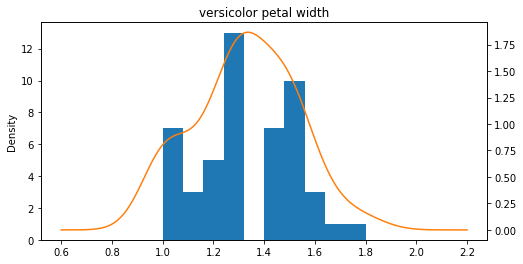

In [ ]:
# versicolor ires 꽃잎 폭 분포

ax = versicolor_df['petal width (cm)'].plot(kind='hist')
versicolor_df['petal width (cm)'].plot(kind='kde', ax=ax, 
            secondary_y=True, 
            title="versicolor petal width", 
            figsize = (8,4))

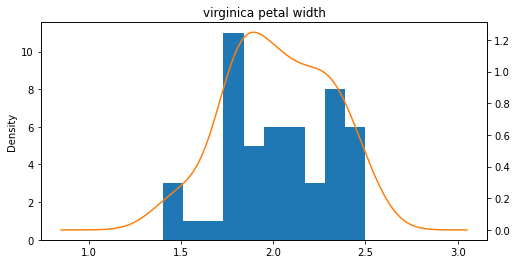

In [ ]:
# virginica ires 꽃잎 폭 분포

ax = virginica_df['petal width (cm)'].plot(kind='hist')
virginica_df['petal width (cm)'].plot(kind='kde', ax=ax, 
            secondary_y=True, 
            title="virginica petal width", 
            figsize = (8,4))

##데이터를 학습 데이터와 테스트 데이터로 나누기

In [ ]:
#★★전체 데이터의 20%를 테스트 데이터로 분류(X가 입력,y는 출력(레이블))★★
#전체 150개 데이터 중 30개를 테스트 데이터로 분류
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2)

##Gaussian Naive Bayes 모델 학습

In [ ]:
# 학습데이터로 모델 학습 실행(학습데이터로 학습 실행)
model = GaussianNB()
model.fit(X_train, y_train) # 실제 Gaussian Naive Bayes 모델 학습 실행 부분

# 테스트 데이터로 모델을 테스트
predicted = model.predict(X_test) #테스트 데이터로 예측 실행
#정밀도,재현율, F1 스코어 출력
print(classification_report(y_test,predicted))
# 0: setosa 1: versicolor 2: virginica

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
# 모델 예측 정확도 출력
print("accuracy : %.2f" %(accuracy_score(y_test,predicted)*100)+"%")

accuracy : 93.33%


In [ ]:
#Confusion Matrix(혼동 행렬) 출력
print(confusion_matrix(y_test,predicted))

[[ 8  0  0]
 [ 0  9  1]
 [ 0  1 11]]
